In [30]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.special import expit
from IPython.display import Image

In [31]:
df = pd.read_csv('/Users/Hector/Documents/Git/capp30254/Homework 2/pipeline/data/cs-training.csv')

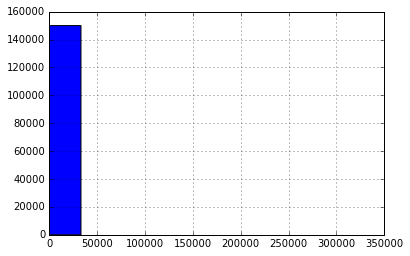

In [35]:
df.DebtRatio.hist()
# looks pretty horrible, right?

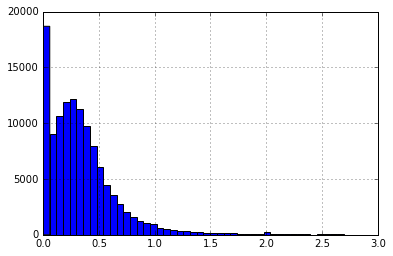

In [36]:
df[df.DebtRatio < 3].DebtRatio.hist(bins=50)
# looks much better, right? 

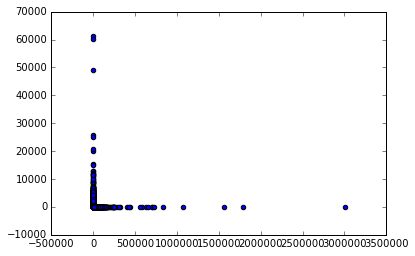

In [33]:
plt.scatter(df.MonthlyIncome, df.DebtRatio)

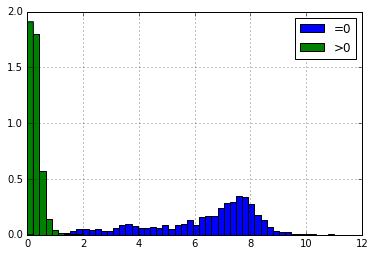

In [34]:
np.log1p(df[df.MonthlyIncome == 0].DebtRatio).hist(bins=50, label='=0', normed=True)
np.log1p(df[df.MonthlyIncome > 0].DebtRatio).hist(bins=50, label='>0', normed=True)
plt.legend()

In [16]:
df.age.hist(bins = np.arange(0,100,5))

In [18]:
df.describe()
# plotting a huge table without looking at numbers
# what about age = 0?
# such a huge debt-ratio!
# So many numbers that don't really say anything...

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [19]:
pd.value_counts(df.NumberOfTimes90DaysLate)
# probably the 98 and 96 are missing data, because they look pretty suspicious...

0     141662
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
11         5
96         5
13         4
12         2
14         2
15         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [22]:
np.corrcoef(df.NumberOfTimes90DaysLate, df['NumberOfTime60-89DaysPastDueNotWorse'])
# suspicious that this is such a high number

array([[ 1.        ,  0.99279618],
       [ 0.99279618,  1.        ]])

In [23]:
plt.scatter(df.NumberOfTimes90DaysLate, df['NumberOfTime60-89DaysPastDueNotWorse'])
# plot to check what's going on...